<a href="https://colab.research.google.com/github/romthom75/demo/blob/main/Group_7_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn, scipy

Part 0 - Exploring dataset

In [ ]:
df=pd.read_csv("train.csv",index_col=0)

In [ ]:
pd.value_counts(df.dtypes)

int64      16
float64     1
dtype: int64

In [ ]:
 df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [ ]:
 df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22730 entries, 0 to 22729
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       22730 non-null  int64  
 1   numberOfRooms      22730 non-null  int64  
 2   hasYard            22730 non-null  int64  
 3   hasPool            22730 non-null  int64  
 4   floors             22730 non-null  int64  
 5   cityCode           22730 non-null  int64  
 6   cityPartRange      22730 non-null  int64  
 7   numPrevOwners      22730 non-null  int64  
 8   made               22730 non-null  int64  
 9   isNewBuilt         22730 non-null  int64  
 10  hasStormProtector  22730 non-null  int64  
 11  basement           22730 non-null  int64  
 12  attic              22730 non-null  int64  
 13  garage             22730 non-null  int64  
 14  hasStorageRoom     22730 non-null  int64  
 15  hasGuestRoom       22730 non-null  int64  
 16  price              227

In [ ]:
display( pd.concat([df.head(), df.tail()], axis=0) )

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
id,,,,,,,,,,,,,,,,,
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


In [ ]:
display(df.nunique())

squareMeters         7319
numberOfRooms         100
hasYard                 2
hasPool                 2
floors                101
cityCode             7810
cityPartRange          10
numPrevOwners          10
made                   33
isNewBuilt              2
hasStormProtector       2
basement             4903
attic                5167
garage                896
hasStorageRoom          2
hasGuestRoom           11
price                7421
dtype: int64

Part 1 - Univariate analysis

In [ ]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [ ]:
cat_cols= ['hasYard', 'hasPool',
           'cityCode', 'cityPartRange',
           'isNewBuilt', 'hasStormProtector',
           'hasStorageRoom', 'hasGuestRoom'
           ]

quant_cols=['squareMeters', 'numberOfRooms',
            'floors',
            'numPrevOwners', 'made',
            'basement', 'attic', 'garage',
            'price']

In [ ]:
df[cat_cols] = df[cat_cols].astype("category")

In [ ]:
df.describe(include="all")

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,2.273000e+04,22730.000000,22730.0,22730.0,22730.000000,22730.0,22730.0,22730.000000,22730.000000,22730.0,22730.0,22730.000000,22730.000000,22730.000000,22730.0,22730.0,2.273000e+04
unique,NaN,NaN,2.0,2.0,NaN,7810.0,10.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2.0,11.0,NaN
top,NaN,NaN,0.0,0.0,NaN,1906.0,8.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,8.0,NaN
freq,NaN,NaN,11913.0,12439.0,NaN,69.0,3255.0,NaN,NaN,12093.0,12274.0,NaN,NaN,NaN,12236.0,2970.0,NaN
mean,4.658622e+04,48.241091,NaN,NaN,47.305983,NaN,NaN,5.620766,2008.005059,NaN,NaN,5283.646634,5067.981698,530.469644,NaN,NaN,4.634457e+06
std,4.952124e+04,28.226428,NaN,NaN,47.777207,NaN,NaN,2.713026,118.826777,NaN,NaN,3047.084412,3097.347939,274.840604,NaN,NaN,2.925163e+06
min,8.900000e+01,1.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,1990.000000,NaN,NaN,4.000000,1.000000,4.000000,NaN,NaN,1.031350e+04
25%,2.039275e+04,25.000000,NaN,NaN,25.000000,NaN,NaN,3.000000,2000.000000,NaN,NaN,2977.250000,2599.000000,297.000000,NaN,NaN,2.041739e+06
50%,4.448400e+04,47.000000,NaN,NaN,45.000000,NaN,NaN,6.000000,2006.000000,NaN,NaN,5359.000000,4977.000000,515.000000,NaN,NaN,4.450823e+06
75%,7.154700e+04,75.000000,NaN,NaN,69.000000,NaN,NaN,8.000000,2014.000000,NaN,NaN,7746.000000,7652.000000,767.000000,NaN,NaN,7.159920e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22730 entries, 0 to 22729
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   squareMeters       22730 non-null  int64   
 1   numberOfRooms      22730 non-null  int64   
 2   hasYard            22730 non-null  category
 3   hasPool            22730 non-null  category
 4   floors             22730 non-null  int64   
 5   cityCode           22730 non-null  category
 6   cityPartRange      22730 non-null  category
 7   numPrevOwners      22730 non-null  int64   
 8   made               22730 non-null  int64   
 9   isNewBuilt         22730 non-null  category
 10  hasStormProtector  22730 non-null  category
 11  basement           22730 non-null  int64   
 12  attic              22730 non-null  int64   
 13  garage             22730 non-null  int64   
 14  hasStorageRoom     22730 non-null  category
 15  hasGuestRoom       22730 non-null  category
 16  pric

In [ ]:
def univ_cat(column,title):

    fig, ax = plt.subplots(1,2, figsize=(8, 3))

    ax[0].bar(column.value_counts().index,column.value_counts())
    ax[0].set_title(title)
    ax[1].pie(column.value_counts(),labels=column.value_counts().index, autopct='%1.1f%%')
    ax[1].set_title(title)

    plt.tight_layout()
    plt.show()

def univ_num(column,title):
    fig, ax = plt.subplots(1,2, figsize=(8, 3))
    ax[0].hist(column, bins=15, edgecolor='gray', color='skyblue')
    ax[0].set_title(title)
    ax[1].boxplot(column)
    ax[1].set_title(title)

    plt.tight_layout()
    plt.show()

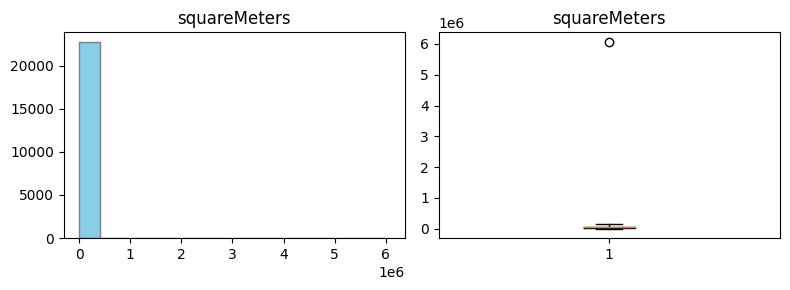

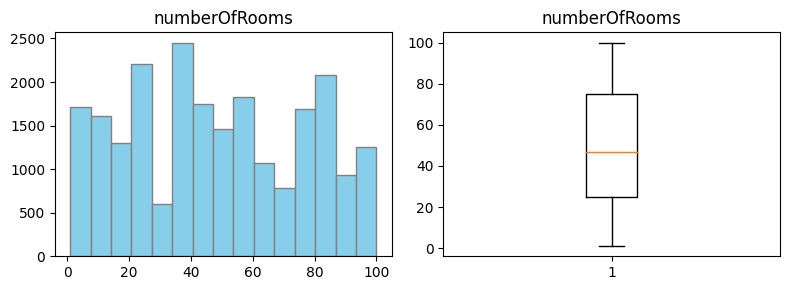

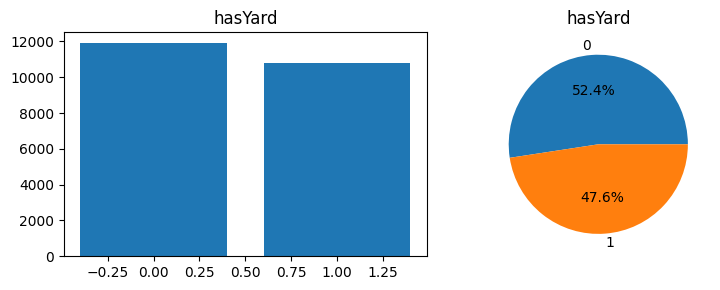

'Now, value_counts() for hasYard:'

0    11913
1    10817
Name: hasYard, dtype: int64

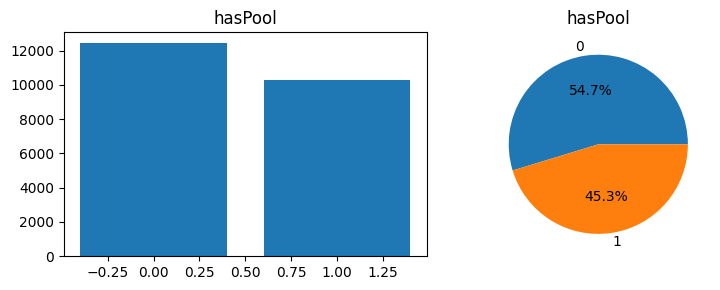

'Now, value_counts() for hasPool:'

0    12439
1    10291
Name: hasPool, dtype: int64

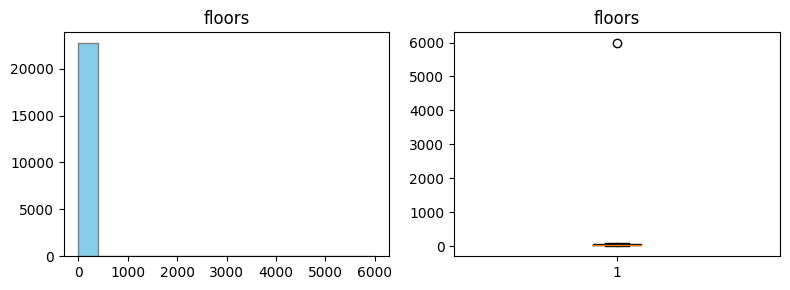

In [ ]:
for i, column in enumerate(list(df.columns)):

    if column in quant_cols:
        univ_num(df[column],column)

    if column in cat_cols:
        univ_cat(df[column],column)
        display("Now, value_counts() for "+column+":")
        display(df[column].value_counts())

Univariate Analysis - Binary Cateogrical Data

In [ ]:
to_drop = ['squareMeters', 'numberOfRooms', 'floors', 'cityPartRange', 'numPrevOwners',
              'numPrevOwners', 'made', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price', 'cityCode']

df_cat = df.drop(to_drop, axis = 1)
df_cat.head()

,hasYard,hasPool,isNewBuilt,hasStormProtector
id,,,,
0,1,0,0,1
1,0,1,0,1
2,1,1,1,1
3,0,0,0,1
4,0,0,1,0


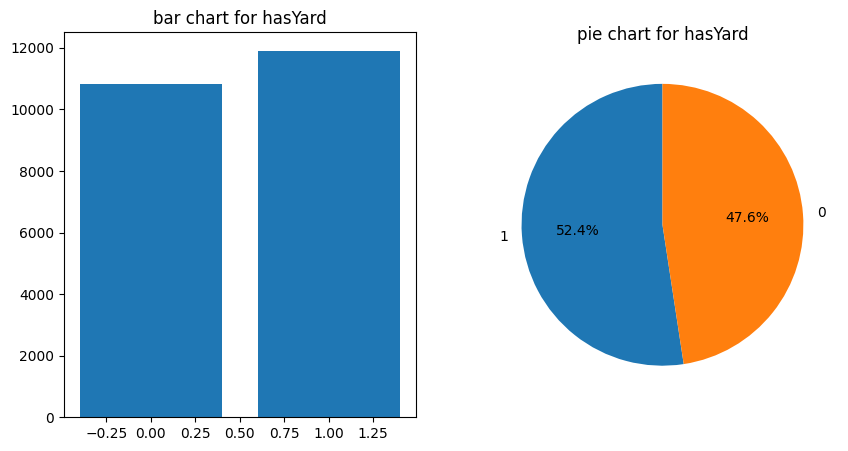

          absolute  relative
0.000000   11913.0       NaN
1.000000   10817.0       NaN
0.524109       NaN       NaN
0.475891       NaN       NaN


In [ ]:
def univ_cat(df, var, figsize = (10,5)):

    df_abs = pd.DataFrame (df[var].value_counts(), index = df[var].value_counts().index)
    df_rel = pd.DataFrame (df[var].value_counts(normalize=True), index = df[var].value_counts(normalize = True))
    df_summary = pd.concat ([df_abs, df_rel], axis = 1)
    df_summary.columns = ['absolute', 'relative']

    fig, (ax1,ax2) = plt.subplots (1,2, figsize = figsize)
    ax1.bar(df[var].unique(), df[var].value_counts())
    ax1.set_title(f"bar chart for {var}")
    ax2.pie(df[var].value_counts(), labels = df[var].unique(), autopct = '%1.1f%%', startangle = 90)
    ax2.set_title(f"pie chart for {var}")
    plt.show()

    return df_summary

print (univ_cat(df_cat, 'hasYard', figsize = (10,5)))

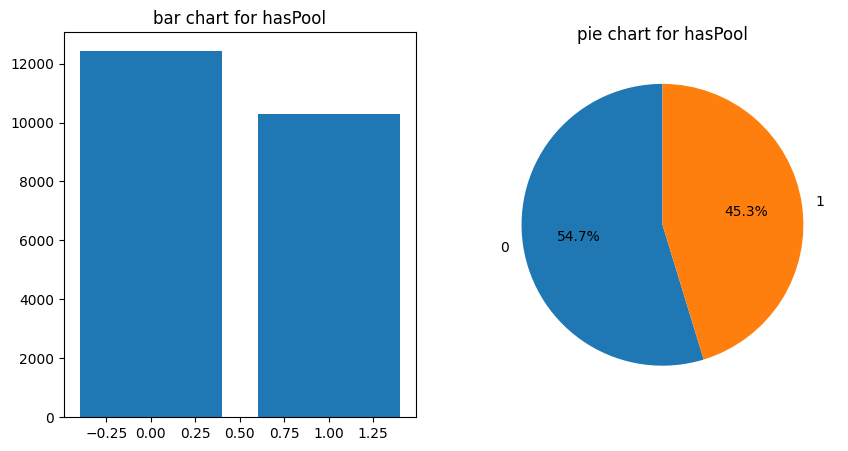

         absolute  relative
0.00000   12439.0       NaN
1.00000   10291.0       NaN
0.54725       NaN       NaN
0.45275       NaN       NaN


In [ ]:
print (univ_cat(df_cat, 'hasPool', figsize = (10,5)))

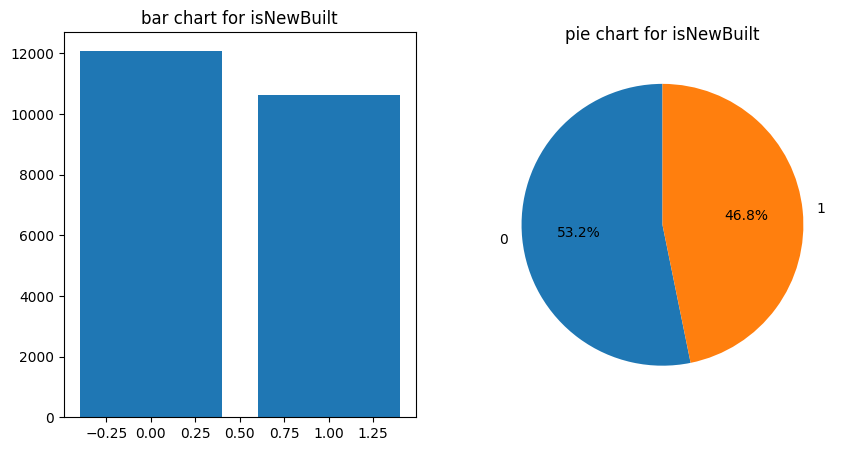

          absolute  relative
0.000000   12093.0       NaN
1.000000   10637.0       NaN
0.532028       NaN       NaN
0.467972       NaN       NaN


In [ ]:
print (univ_cat(df_cat, 'isNewBuilt', figsize = (10,5)))

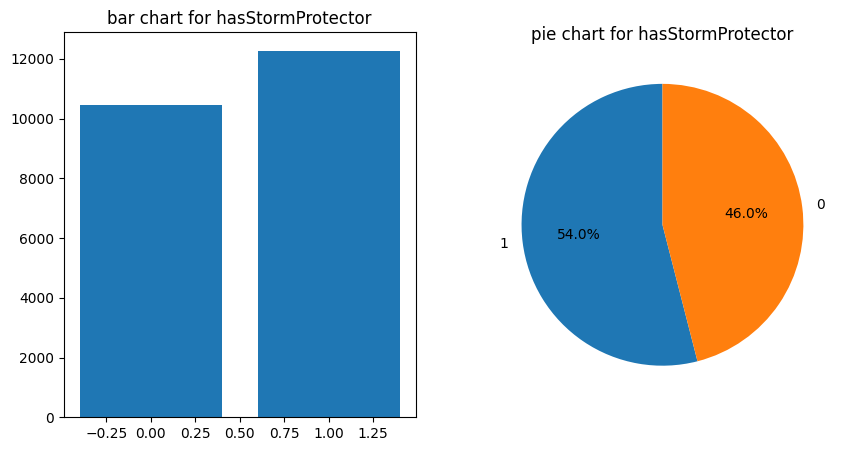

          absolute  relative
0.000000   12274.0       NaN
1.000000   10456.0       NaN
0.539991       NaN       NaN
0.460009       NaN       NaN


In [ ]:
print (univ_cat(df_cat, 'hasStormProtector', figsize = (10,5)))

# Part 2 - Bivariate Analysis

Part 2.1 - Bivariate Analysis - Quantitative Variables

In [ ]:
def no_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)

   IQR=q3-q1

   df_no_outliers = df[((df>(q1-3*IQR)) & (df<(q3+3*IQR)))]

   return df_no_outliers

In [ ]:
df[quant_cols]=no_outliers_IQR(df[quant_cols])

<ipython-input-32-5dd9704e0c5d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'hasGuestRoom', 'price']].corr()


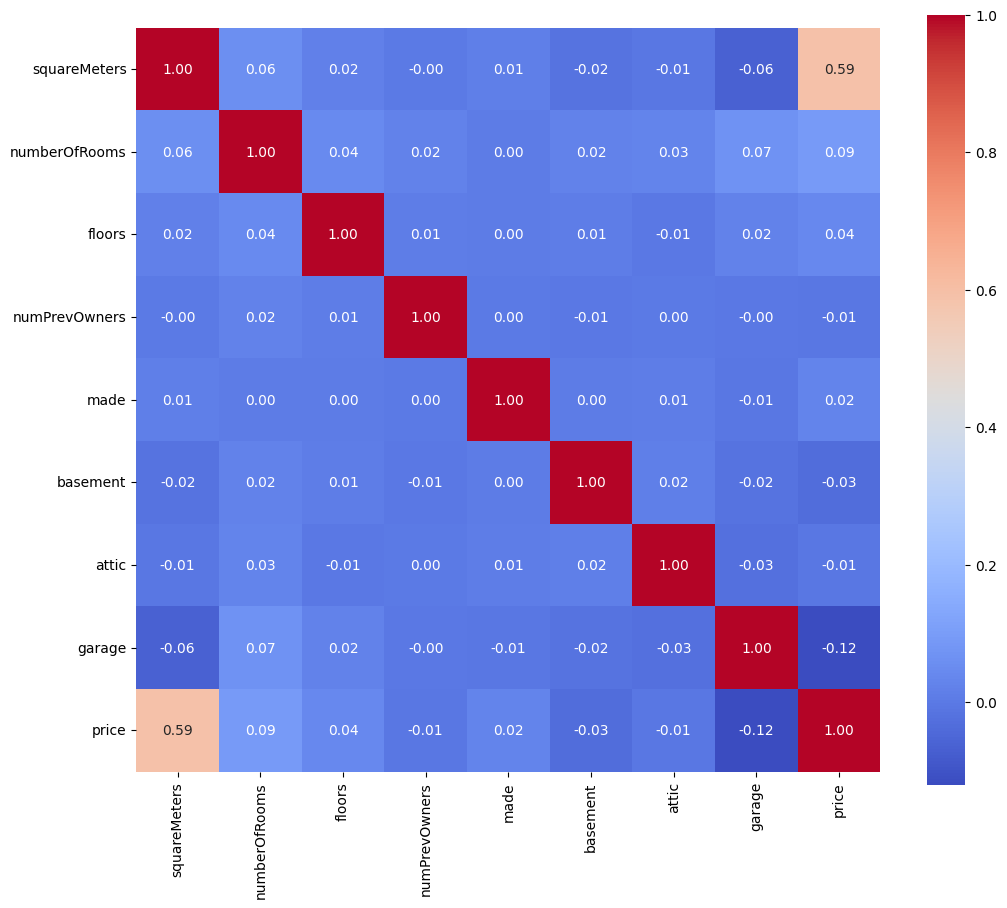

In [ ]:
correlation_matrix = df[['squareMeters', 'numberOfRooms', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made',
       'hasStormProtector', 'basement', 'attic', 'garage',
       'hasGuestRoom', 'price']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",square=True)
plt.show()

In [ ]:
Part 2.3 - Bivariate Analysis - Quantitative and Qualitative Variables